<b>

<p>
<center>
<font size="5">
House Prices Prediction
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Author: Junchi Tian
</font>
</center>
</p>

</b>

# Import packages

In [82]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
os.chdir('C:\\Users\\junch\\Desktop\\Housing Price')

# Load data

In [26]:
train_raw=pd.read_csv('train.csv')
test_raw=pd.read_csv('test.csv')

In [27]:
train_raw.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
print('the train data has {} rows and {} columns'.format(train_raw.shape[0],train_raw.shape[1]))
print('the test data has {} rows and {} columns'.format(test_raw.shape[0],test_raw.shape[1]))

the train data has 1460 rows and 81 columns
the test data has 1459 rows and 80 columns


# Data Processing

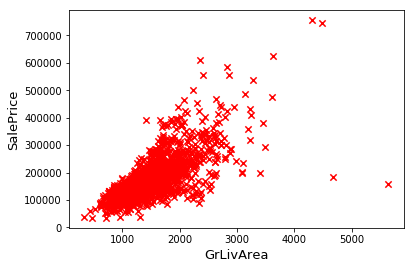

In [29]:
#Check the outliers
plt.scatter(x = train_raw['GrLivArea'], y = train_raw['SalePrice'], marker = 'x',color = 'red', s = 40 ,label = 'First')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [30]:
from random import random
import statsmodels.api as smapi
from statsmodels.formula.api import ols
import statsmodels.graphics as smgraphics

# Make fit #
regression = ols("train_raw['SalePrice'] ~ train_raw['GrLivArea']" ,data=train_raw).fit()
# Find outliers #
result = regression.outlier_test()
train_raw = train_raw.drop(result[result['unadj_p']<0.001].index)

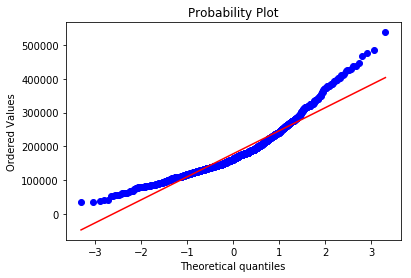

In [31]:
# Check the skewness of dependent variable
fig = plt.figure()
res = stats.probplot(train_raw['SalePrice'], plot=plt)
plt.show()

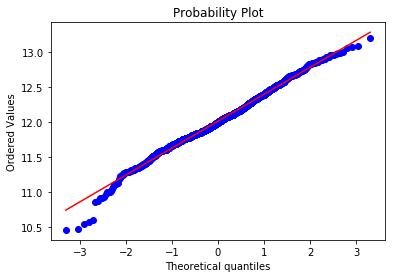

In [32]:
# Use log transformation
train_raw["SalePrice"] = np.log1p(train_raw["SalePrice"])

fig = plt.figure()
res = stats.probplot(train_raw['SalePrice'], plot=plt)
plt.show()

In [33]:
# Exaract y_train
y_train = train_raw.SalePrice.values
data=pd.concat([train_raw.iloc[:,:-1],test_raw],axis=0)
data.shape

(2904, 80)

In [34]:
# Check the missing values
data.isnull().sum().sort_values(ascending=False).head(34)

PoolQC          2896
MiscFeature     2799
Alley           2706
Fence           2334
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        23
MasVnrArea        22
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
Exterior1st        1
Exterior2nd        1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64

In [35]:
data = data.drop(columns=['Id','Street','PoolQC','Utilities'],axis=1)

In [36]:
# For these categorical features, NA means None
drop_none=['MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageQual','GarageType','GarageFinish','BsmtQual', 
 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType','MSSubClass']
for name in drop_none:
    data[name].fillna('None',inplace=True)

In [37]:
# For these numerical features, NA means 0
drop_0=['GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 
        'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea']
for name in drop_0:
    data[name].fillna(0,inplace=True)

In [38]:
# For these features, we use mode to replace NA.
drop_mode=['MSZoning','Functional','Exterior2nd','SaleType','Electrical','KitchenQual','Exterior1st']
for name in drop_mode:
    data[name].fillna(data[name].mode()[0],inplace=True)

In [39]:
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [40]:
# Transform numerical to categorical
data['MSSubClass'] = data['MSSubClass'].apply(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [41]:
data.isnull().sum().sort_values(ascending=False).head(10)

SaleCondition    0
BsmtQual         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtCond         0
dtype: int64

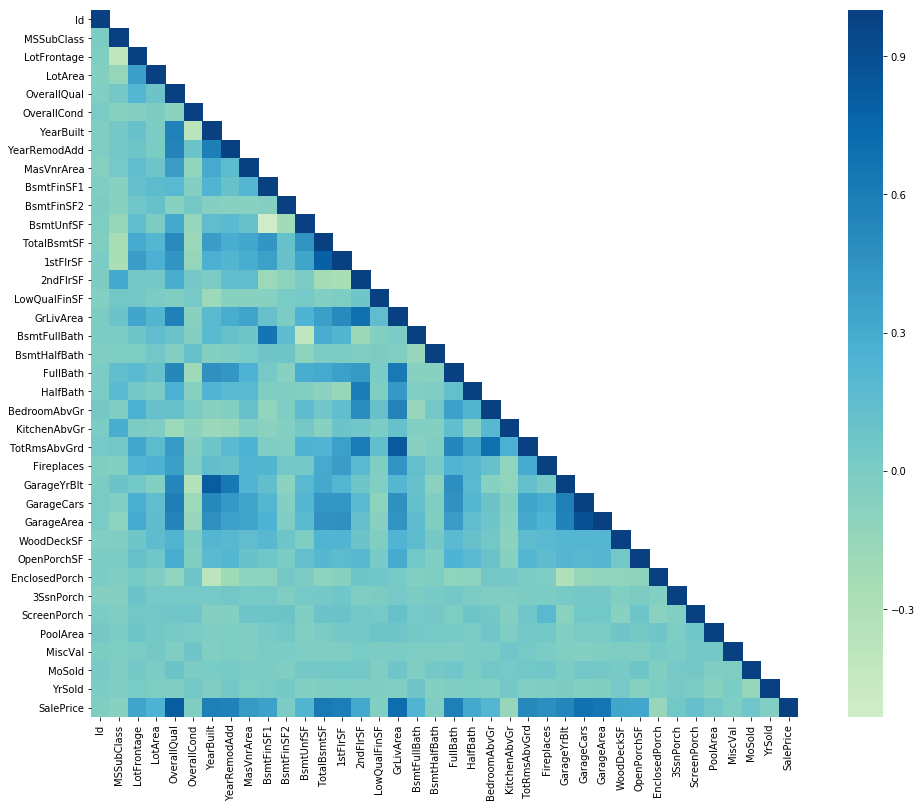

In [42]:
#Check correlation matrix.
plt.figure(figsize=(18,13))

corr_matrix=train_raw.corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr_matrix, vmax=1, mask=mask,square=True,cmap="GnBu",center=0)

In [43]:
pd.set_option('display.max_columns', 40)
corr_matrix[corr_matrix>0.6]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSSubClass,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.812205
OverallCond,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.823341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.637942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.661344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Deep feature engineer
data['YrBltAndRemod']=data['YearBuilt']+data['YearRemodAdd']
data['TotalSF']=data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

data['Total_sqr_footage'] = (data['BsmtFinSF1'] + data['BsmtFinSF2'] +
                                 data['1stFlrSF'] + data['2ndFlrSF'])

data['Total_Bathrooms'] = (data['FullBath'] + (0.5 * data['HalfBath']) +
                               data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))

data['Total_porch_sf'] = (data['OpenPorchSF'] + data['3SsnPorch'] +
                              data['EnclosedPorch'] + data['ScreenPorch'] +
                              data['WoodDeckSF'])

# simplified features
data['haspool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
data['has2ndfloor'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasgarage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data['hasbsmt'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasfireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


In [45]:
# By box-cos transformation, residuals will be normal distributed.
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in data.columns:
    if data[i].dtype in numeric_dtypes:
        numerics.append(i)

skew_features = data[numerics].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

In [46]:
from scipy.special import boxcox1p
for i in skew_index:
    data[i] = boxcox1p(data[i],0.15)

In [47]:
# One-hot encoding
data = pd.get_dummies(data)
data.shape

(2904, 333)

In [48]:
#Reset the train and the test data
train = data.iloc[:1445]
test = data.iloc[1445:]
print('the train data has {} rows and {} columns'.format(train.shape[0],train.shape[1]))
print('the test data has {} rows and {} columns'.format(test.shape[0],test.shape[1]))

the train data has 1445 rows and 333 columns
the test data has 1459 rows and 333 columns


# Modeling

In [49]:
# Import the packages
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [50]:
# Cross validation and score
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [51]:
# Model Ridge Regression
ridge = make_pipeline(RobustScaler(),Ridge(alpha=0.0005,random_state=2))

In [52]:
# Model Lasso Regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [53]:
# Model Elastic Net Regression
enet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [54]:
# Model Kernel Ridge Regression 
krr = KernelRidge(alpha=0.5, kernel='polynomial', degree=2, coef0=2.5)

In [55]:
# Model Support Vector Regressor
svr = make_pipeline(RobustScaler(),
                      SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [56]:
# Model Gradient Boosting Regressor
gboost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [57]:
# Model XGBoost
xgboost = XGBRegressor(colsample_bytree=0.2,gamma=0.0,learning_rate=0.05,
                           max_depth=6,min_child_weight=1.5,n_estimators=7200,
                           reg_alpha=0.9,reg_lambda=0.6,subsample=0.2,seed=42,silent=1)

In [58]:
# Model lightbgm
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

In [59]:
# Stacking: we just average Enet KRR and Gboost, then we add lasso as meta-model.
stack_gen = StackingCVRegressor(regressors=(enet,svr,
                                            gboost),
                                meta_regressor=lasso,
                                use_features_in_secondary=True)

In [60]:
score = rmsle_cv(ridge)
score.mean()

0.125565921930812

In [61]:
score = rmsle_cv(lasso)
score.mean()

0.1079103270309957

In [62]:
score = rmsle_cv(enet)
score.mean()

0.10795303958633343

In [63]:
score = rmsle_cv(krr)
score.mean()

0.2785649127459869

In [64]:
score = rmsle_cv(svr)
score.mean()

0.10890282705892433

In [65]:
score = rmsle_cv(gboost)
score.mean()

0.11511308639632747

In [66]:
score = rmsle_cv(xgboost)
score.mean()

0.11741887506397045

In [67]:
score = rmsle_cv(lightgbm)
score.mean()

0.11344374471830476

In [68]:
score = rmsle_cv(stack_gen)
score.mean()

0.10530869267230869

In [69]:
ridge.fit(train.values,y_train)
pred_ri=ridge.predict(test)
preds_ri=np.exp(pred_ri)

In [70]:
lasso.fit(train.values,y_train)
pred_la=lasso.predict(test)
preds_la=np.exp(pred_la)

In [71]:
enet.fit(train.values,y_train)
pred_en=enet.predict(test)
preds_en=np.exp(pred_en)

In [72]:
krr.fit(train.values,y_train)
pred_kr=krr.predict(test)
preds_kr=np.exp(pred_kr)

In [73]:
svr.fit(train.values,y_train)
pred_sv=svr.predict(test)
preds_sv=np.exp(pred_sv)

In [74]:
gboost.fit(train.values,y_train)
pred_gb=gboost.predict(test)
preds_gb=np.exp(pred_gb)

In [75]:
xgboost.fit(train,y_train)
pred_xg=xgboost.predict(test)
preds_xg=np.exp(pred_xg)

In [76]:
stack_gen.fit(np.array(train),np.array(y_train))
pred_sg=stack_gen.predict(test.values)
preds_sg=np.exp(pred_sg)

In [79]:
# Blending
ensemble = preds_sg*0.40+preds_la*0.20+preds_en*0.20+preds_sv*0.20

In [83]:
mix_1 = pd.read_csv('best_submission.csv')
mix_2 = pd.read_csv('blend_submission.csv')
mix_3 = pd.read_csv('house_price_submission.csv')

In [84]:
ensemble = np.floor((0.25 * ensemble) + 
                    (0.25 * mix_1.iloc[:,1])+ 
                    (0.25 * mix_2.iloc[:,1])+ 
                    (0.25 * mix_3.iloc[:,1]))

In [85]:
q1 = ensemble.quantile(0.005)
q2 = ensemble.quantile(0.99)
ensemble = ensemble.apply(lambda x: x if x > q1 else x*0.75)
ensemble = ensemble.apply(lambda x: x if x < q2 else x*1.08)

# Submission

In [86]:
output=pd.DataFrame({'Id':test_raw.Id, 'SalePrice':ensemble})
output.to_csv('submission.csv', index=False)